# Object (variable) Method (function)

**We will show how to use classes and methods in Python to make the codes more elegant and easier to read.**

The main idea of classes is that sometimes you want to put various pieces of data, and functions that manipulate the data in one place. The functions are called methods of the class.

For example, a vector in $\mathbb{R}^3$ is represented by three floats. So why not make a new data type that contains three floats and call it a vector?

Actually, let's make a list of all the things we know we can do to vectors in $\mathbb{R}^3$. We can:

- Have x, y, z variables for the three coordinates,
- take the length of a vector (a.k.a., 2-norm),
- we can normalize the vector, meaning we can divide it by the norm so that it now has the same direction but has length 1,
- take dot product of two vectors, i.e. take $(x_1,y_1,z_1)\cdot(x_2,y_2,z_2)=x_1x_2+y_1y_2+z_1z_2$,
- add vectors,
- multiply a vector by a scalar
- take cross product of two vectors

We will make a new type of object in Python, called Vector, that allows us to do all of these things.

In [43]:
import math 
# it is always a good habit to import module outside a function or a class
class Vector():
    
    # initialize the vector, we will say   
    # v = Vector(1,2,3)
    # to get a new vector with those coordinated
    def __init__(self, xx, yy, zz): # __init__() is initialization
        # self is refering to an obj in this class
        # xx, yy, zz are the input the user gives
        self.x = xx
        self.y = yy
        self.z = zz
    
    # compute the norm
    def norm(self):
        return math.sqrt(self.x*self.x + self.y*self.y + self.z*self.z)

    # divide by the norm
    def normalize(self): 
        # this returns the unit vector in the same direction with a Vector obj
        # if a function/method has only self as input inside
        # the class definition, in executing this function outside
        # input can be left empty
        no = self.norm()
        self.x /= no # self.x = self.x/no
        self.y /= no
        self.z /= no    

# note that every function has self in it, so that it can access the information of the class

The `class` specifies what constitutes an object (the variables in it, which are all the variables that appear as self.---), and the functions that can be used. To create an object of the class, a.k.a. an instance of the class, we need to call the name of the class as if it's a function.

In [44]:
v=Vector(1,2,5)
# the arguments of this call must match the arguments of the __init__ 
# function in the class, except the self part

In [45]:
v.x

1

In [46]:
v.norm()

5.477225575051661

In [47]:
v.normalize()

In [48]:
v.x

0.18257418583505536

In [49]:
v.norm()

1.0

In [50]:
print(v)

`print` gives us something that tells you that v is a vector at some memory location. Whenever we invoke Python's `print` command, it first applies the Python `repr` function to the item you are printing. The `repr` returns a string containing a printable version of the object you are printing. We can customize this behavior by adding the `__repr__(self)` function in this class.

In [1]:
import math
class Vector():
    
    def __init__(self, xx, yy, zz):
        self.x = xx
        self.y = yy
        self.z = zz
    
    def norm(self):
        return math.sqrt(self.x*self.x + self.y*self.y + self.z*self.z)

    def normalize(self):
        no = self.norm()
        self.x /= no
        self.y /= no
        self.z /= no    
    
    def __repr__(self):
        # return "<" + str(self.x)[:5] + " , " + str(self.y)[:5] + " , " + str(self.z)[:5] + ">"
        return "(" + str(self.x) + " , " + str(self.y) + " , " + str(self.z) + ")"
# note that every function has self in it, so that it can access the information of the class

In [2]:
v=Vector(1,3,5)
v.x

1

In [53]:
print(v)

(1 , 3 , 5)


Let's also add dot products, scalar multiplication:

In [54]:
import math
class Vector():
    
    def __init__(self, xx, yy, zz):
        self.x = xx
        self.y = yy
        self.z = zz
    
    def norm(self):
        return math.sqrt(self.x*self.x + self.y*self.y + self.z*self.z)

    def normalize(self):
        no = self.norm()
        self.x /= no
        self.y /= no
        self.z /= no    
    
    def __repr__(self):
        return "(" + str(self.x) + " , " + str(self.y) + " , " + str(self.z) + ")"
    
    def dot(self, w):
        # dot function's syntax will be v.dot(w)
        return self.x * w.x + self.y * w.y + self.z * w.z
    
    # returns a new vector without modifying the original
    def times_scalar(self, alpha):
        return Vector(alpha * self.x, alpha * self.y, alpha * self.z)
#         return (alpha * self.x, alpha * self.y, alpha * self.z) 
        # this does not return to an obj in the original class
        
# note that every function has self in it, so that it can access the information of the class

In [55]:
u=Vector(1,3,5)
v=Vector(2,4,6)

In [56]:
u.dot(v)

44

In [57]:
u.times_scalar(2)

(2 , 6 , 10)

We can also write addition of vectors, we could write `add(self,w)` in the class and use `v.add(w)` to add `v` and `w`, but we could also overload the `+` operator as follows:

In [58]:
import math
class Vector():
    
    def __init__(self, xx, yy, zz):
        self.x = xx
        self.y = yy
        self.z = zz
    
    def norm(self):
        return math.sqrt(self.x*self.x + self.y*self.y + self.z*self.z)

    def normalize(self):
        no = self.norm()
        self.x /= no
        self.y /= no
        self.z /= no    
    
    def __repr__(self):
        return "(" + str(self.x) + " , " + str(self.y) + " , " + str(self.z) + ")"
    
    def dot(self, w):
        # dot function's syntax will be v.dot(w)
        return self.x * w.x + self.y * w.y + self.z * w.z
    
    # returns a new vector without modifying the original
    def times_scalar(self, alpha):
        return Vector(alpha * self.x, alpha * self.y, alpha * self.z)
#         return (alpha * self.x, alpha * self.y, alpha * self.z) 
        # this does not return to an obj in the original class
    
    def __add__(self, w):
        # this function extends the built-in + for Vector class
        return Vector(self.x + w.x, self.y + w.y, self.z + w.z)

    def __sub__(self, w):
        # this function extends the built-in + for Vector class
        return Vector(self.x - w.x, self.y - w.y, self.z - w.z)
        
    def __mul__(self, w):
        # this function extends the built-in + for Vector class
        return Vector(self.x * w.x, self.y * w.y, self.z * w.z)
    
# note that every function has self in it, so that it can access the information of the class

In [59]:
u=Vector(1,3,5)
v=Vector(2,4,6)

In [60]:
u+v

(3 , 7 , 11)

In [61]:
u-v

(-1 , -1 , -1)

In [62]:
u*v

(2 , 12 , 30)

## Logistic Regression

We will write a class for Logistic regression and define methods train and predict for it.

**Model**: 
$$
\min_{W}\ell(W)= \sum_{j=1}^N\sum_{j=1}^L -y_{n,j} \ln p_{n,j} + \mu \|W\|^2,
$$
where $p_{n,j}=P(c_j|x_n)=\frac{\exp(f_j(x_n))}{\sum_{l=1}^L \exp(f_l(x_n))}$, for $1\leq j\leq L$ and $1\leq n\leq N$, and $f_l(x)=w_l^T \tilde{x}$.

**Gradient**:
\begin{align*}
\nabla \ell(W) = (P-Y)^TX + 2\mu W,
\end{align*}
where $W=\begin{pmatrix} w_1^T \\ \vdots \\ w_L^T \end{pmatrix}$, $X=\begin{pmatrix}\tilde{x}^T_1\\ \vdots\\ \tilde{x}^T_N \end{pmatrix}$, $P=[p_{n,j}]_{n=1,j=1}^{N,L}$ and $Y=\begin{pmatrix} y_1^T\\ \vdots \\ y_N^T \end{pmatrix}$

In [76]:
import numpy as np

class Logistic:
    
    def _init_(self,w):
        self.W=None # set up the weight matrix
        
    def train(self, training_input, training_output, num_iters, learning_rate, reg_par, verbose=True):
        """
        Train Logistic regression classifier using gradient descent method

        Parameters
        ----------
        X: (N x D) array of training data, each row is a training sample with D-dimension.
        y: (N, ) 1-dimension array of target data with length N.
        learning_rate: (float) learning rate for optimization.
        reg: (float) regularization parameter for optimization.
        num_iters: (integer) number of steps to take when optimization.
        verbose: (boolean) if True, print out the progress (loss) when optimization.

        Returns
        -------
        losses_history: (list) of losses at each training iteration
        """
        
        
        X=training_input
        num_train,dim = X.shape
        
        X=np.hstack((np.ones([num_train,1]),X))# add a column of all ones to the training data
        dim=dim+1
        
        y=training_output  # assume y takes values 0...L-1 where L is number of classes
        num_classes = int(np.max(y)) + 1
        
        # convert the labels into vectorized labels
        Y=np.zeros([num_train,num_classes])
        for i in range(num_train):
            Y[i,:]=np.eye(num_classes)[int(y[i]),:]
        
        if self.W is None:
            self.W=np.zeros([num_classes,dim]) # set the initial values of the coefficient matrix
        
        losses_history = []
        
        for i in range(num_iters):
            # compute the matrix P
            P=np.zeros([num_train, num_classes])
            for j in range(num_train):
                P[j, :]=np.exp(self.W@X[j,:])/np.sum(np.exp(self.W@X[j,:]))
            
            # update W with gradient descent
            grad=(P-Y).T@X + 2*reg_par*self.W
            self.W= self.W - learning_rate*grad
            
            # compute the loss function
            loss=np.sum(-Y*np.log(P)) + reg_par*np.linalg.norm(self.W)**2
            losses_history.append(loss)
            
            if verbose and (i % 100 == 0):
                print('iteration %d/%d: loss %f' % (i, num_iters, loss))

        return losses_history
    
    
    def predict(self, testing_input):
        """
        Predict value of y using trained weights

        Parameters
        ----------
        X: (N x D) array of data, each column is a sample with D-dimension.

        Returns
        -------
        pred_ys: (N, ) 1-dimension array of y for N sampels
        """
        
        X=testing_input
        num_test,dim = X.shape
        
        X=np.hstack((np.ones([num_test,1]),X))# add a column of all ones to the training data
        dim=dim+1
        
        pred_ys = np.zeros(num_test)
        scores = X@(self.W.T)
        pred_ys = np.argmax(scores, axis=1)
        
        return pred_ys
    
    
            
    

In [79]:
Log = Logistic
#Log.w
help(Logistic)

Help on class Logistic in module __main__:

class Logistic(builtins.object)
 |  Methods defined here:
 |  
 |  predict(self, testing_input)
 |      Predict value of y using trained weights
 |      
 |      Parameters
 |      ----------
 |      X: (N x D) array of data, each column is a sample with D-dimension.
 |      
 |      Returns
 |      -------
 |      pred_ys: (N, ) 1-dimension array of y for N sampels
 |  
 |  train(self, training_input, training_output, num_iters, learning_rate, reg_par, verbose=True)
 |      Train Logistic regression classifier using gradient descent method
 |      
 |      Parameters
 |      ----------
 |      X: (N x D) array of training data, each row is a training sample with D-dimension.
 |      y: (N, ) 1-dimension array of target data with length N.
 |      learning_rate: (float) learning rate for optimization.
 |      reg: (float) regularization parameter for optimization.
 |      num_iters: (integer) number of steps to take when optimization.
 |     

### Test the Logistic class with some simulation data 

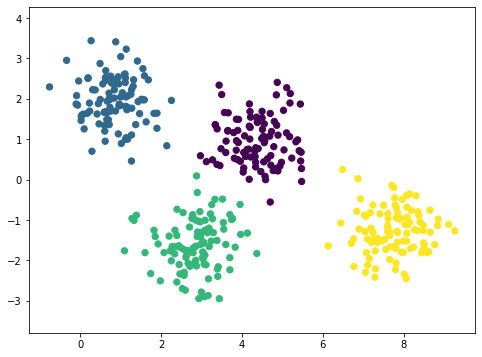

In [74]:
# Generate some simulation data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis');

In [65]:
X.shape

(400, 2)

### Suppose we only use part of the labels and the other part as unlabeled data. We will use self training to solve the semi-supervised learning problem

In [66]:
num_lab=25
lab_id = np.random.choice(len(X), num_lab)
unlab_id=[i for i in range(len(X)) if i not in lab_id]
Xl=X[lab_id]
yl=y_true[lab_id]


Xu=X[unlab_id]
yu_t=y_true[unlab_id]

In [67]:
model=Logistic()
loss=model.train(Xl, yl, 2000, 1.E-4, 1.E-3, True)

AttributeError: 'Logistic' object has no attribute 'W'

In [ ]:
yu=model.predict(Xu)
sum(yu==yu_t)/len(yu)

### self training: find the pseudo labels for unlabeled data and retrain with both pseudo labels and labeled data together

In [ ]:
Xc=np.array(list(Xl)+list(Xu))
yc=np.array(list(yl)+ list(yu))
loss=model.train(Xc, yc, 2000, 1.E-4, 1.E-3, True)

In [ ]:
yu=model.predict(Xu)
sum(yu==yu_t)/len(yu)

In [ ]:
a=None
if a is None:
    print('correct')
    a=1

In [ ]:
a